#Dataset - March 25, 2020 to June 23, 2020 vs March 25, 2018 to June 23, 2018, First strict lockdown - March 25th, lockdown ended - May 3rd

In [59]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import io
import os
import csv
import requests
import json

In [60]:
base_url = 'https://api.openaq.org/v1/measurements?'

In [61]:
# Delhi location center: Aya Nagar, Delhi - IMD
# Delhi coordinates: 28.47,77.10

# Mumbai location center: Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB
# Mumbai coordinates: 19.10,72.83

# Chennai location center: Velachery Res. Area, Chennai - CPCB
# Chennai coordinates: 13.00,80.23

# Patna location center: Govt. High School Shikarpur, Patna - BSPCB
# Patna coordinates: 25.59,85.22

coordinates = ['28.47,77.10', '19.10,72.83', '13.00,80.23', '25.59,85.22']
start_time = '2020-06-22'
end_time = '2020-06-22T23:45:00'
output = 'csv'

for coordinate in coordinates:
    target_url = (f'{base_url}date_from={start_time}&date_to={end_time}&format={output}&coordinates={coordinate}')
    df = pd.read_csv(target_url)
    df.to_csv(f"{coordinate}_data.csv")

Read each individual city CSV 

In [62]:
from os import path

os.rename('28.47,77.10_data.csv','Delhi_daya.csv')
os.rename('19.10,72.83_data.csv','Mumbai_data.csv')
os.rename('13.00,80.23_data.csv','Chennai_data.csv')
os.rename('25.59,85.22_data.csv','Patna_data.csv')

In [63]:
chennai_df = pd.read_csv('chennai_data.csv')

In [64]:
delhi_df = pd.read_csv('delhi_data.csv')

In [65]:
mumbai_df = pd.read_csv('mumbai_data.csv')

In [66]:
patna_df = pd.read_csv('patna_data.csv')

In [67]:
dfs = [chennai_df, delhi_df, mumbai_df, patna_df]
complete_city_df = pd.concat(dfs)
complete_city_df.head()

,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,0,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,no2,3.27,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
1,1,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,so2,3.85,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
2,2,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,co,1010.00,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
3,3,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,pm25,6.35,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
4,4,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,o3,0.00,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."


Test Dataframe with header 

In [68]:
# FOURcities_merged_df = FOURcities_mergedf.drop('country_x_x', 3)
# FOURcities_merged_df.head()

Summary Table - 
**Cities:** Mumbai, Delhi, Chennai, Patna 

*   **Cities:** Mumbai, Delhi, Chennai, Patna 
*   **Statistical Distributions:**
Mean, Median, Range, Stvd, SEM, IQR 
*   **Pollutants (values)**: PM25


* **Cross Sectional Dates: *** PreCOVID 2017 - EX: 6/22/2017
COVID Present - EX: 6/22/2020








In [69]:
df_pm25 = complete_city_df.loc[complete_city_df['parameter'] == 'pm25']
df_pm25.head()

,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
3,3,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:30:00.000Z,2020-06-23T05:00:00+05:30,pm25,6.35,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
6,6,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T23:00:00.000Z,2020-06-23T04:30:00+05:30,pm25,8.15,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
14,14,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T22:45:00.000Z,2020-06-23T04:15:00+05:30,pm25,8.15,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
16,16,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T22:30:00.000Z,2020-06-23T04:00:00+05:30,pm25,8.61,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."
23,23,"Velachery Res. Area, Chennai - CPCB",Chennai,IN,2020-06-22T21:15:00.000Z,2020-06-23T02:45:00+05:30,pm25,7.87,µg/m³,13.005219,80.239812,"[{""name"":""Central Pollution Control Board"",""ur..."


In [70]:
 # If the data is in a dataframe, we use pandas to give quartile calculations pm25

grouped_cities_pm25_df = df_pm25.groupby(["city"])
# grouped_cities_df.head()


avg_value = grouped_cities_pm25_df["value"].mean()
# avg_value.head()


median_value = grouped_cities_pm25_df["value"].median()
# median_value.head()


var_value = grouped_cities_pm25_df["value"].var()
# var_value.head()
std_value = grouped_cities_pm25_df["value"].std()
# std_value.head()
sem_value = grouped_cities_pm25_df["value"].sem()
# sem_value.head()
 
citystats_pm25_df = pd.DataFrame({"Mean":avg_value, "Median":median_value,"Standard Deviation": std_value, "Variance":var_value, "SEM":sem_value})
citystats_pm25_df


,Mean,Median,Standard Deviation,Variance,SEM
city,,,,,
Chennai,27.321500,19.990,19.315284,373.080203,4.319029
Delhi,34.005763,30.260,42.541377,1809.768735,0.620464
Mumbai,10.485556,8.855,5.047283,25.475061,1.189656
Patna,6.456667,6.760,2.345991,5.503673,0.511937


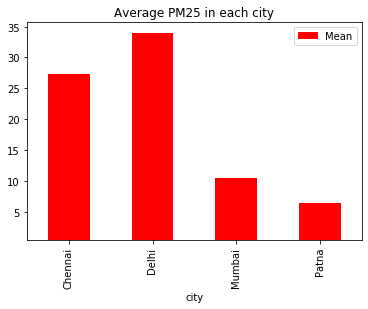

In [79]:
test = citystats_pm25_df["Mean"]
test.plot(kind= "bar", color="red", legend=True, xlim=100, title="Average PM25 in each city", ylim=0.5)


#plt.xlabel("Drug Regimen")
#plt.xticks(rotation=90)
#plt.ylabel("Number of Mice")
#plt.title("Mice per Timepoint / Treatment")
#plt.legend(["Drug Regimen"])
# Set x and y limits
#plt.xlim(-0.75)
#plt.ylim(0.5)

Calculate IQR for prep Box Plot 

In [ ]:
#  IQR Min, Median, Max
# patna
df_pm25_patna = patna_df.loc[patna_df['parameter'] == 'pm25']
df_pm25_patna.head()

quartiles = df_pm25_patna['value'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of pm25 is: {lowerq}")
print(f"The upper quartile of pm25 is: {upperq}")
print(f"The interquartile range of pm25 is: {iqr}")
print(f"The the median of pm25 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



# chennai 
df_pm25_chennai = chennai_df.loc[chennai_df['parameter'] == 'pm25']
df_pm25_chennai.head()

quartiles = df_pm25_chennai['value'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of pm25 is: {lowerq}")
print(f"The upper quartile of pm25 is: {upperq}")
print(f"The interquartile range of pm25 is: {iqr}")
print(f"The the median of pm25 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#  mummbai 
df_pm25_mumbai = mumbai_df.loc[mumbai_df['parameter'] == 'pm25']
df_pm25_mumbai.head()

quartiles = df_pm25_mumbai['value'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of pm25 is: {lowerq}")
print(f"The upper quartile of pm25 is: {upperq}")
print(f"The interquartile range of pm25 is: {iqr}")
print(f"The the median of pm25 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
df_pm25_patna = patna_df.loc[patna_df['parameter'] == 'pm25']
df_pm25_patna.head()

#  delhi
df_pm25_delhi = delhi_df.loc[delhi_df['parameter'] == 'pm25']
df_pm25_delhi.head()

quartiles = df_pm25_delhi['value'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of pm25 is: {lowerq}")
print(f"The upper quartile of pm25 is: {upperq}")
print(f"The interquartile range of pm25 is: {iqr}")
print(f"The the median of pm25 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Create a list to use as labels and dataframe
ALL_FOUR = ['Delhi', 'Patna', 'Mumbai', 'Chennai']
flierprops = dict(markerfacecolor= "red")


# Title and Labels         
plt.boxplot([delhi_df["value"],patna_df["value"],mumbai_df["value"],chennai_df["value"]], flierprops=flierprops, labels= ALL_FOUR)
plt.ylim(0, 500)
plt.title("Box Plot", fontweight= "bold")
plt.xlabel("Cities", fontweight= "bold")
plt.ylabel("PM25_Value", fontweight= "bold")
plt.show()


In [ ]:
df_pm25_patna = patna_df.loc[patna_df['parameter'] == 'pm25']
df_pm25_patna.head()






Box Plot of PM25 (y-axis) in each city (x-axis) on 4/1/2020 


In [ ]:


temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('PM25 Levels in Cities')
ax1.set_ylabel('PM25 levels)')
ax1.boxplot(temperatures)
plt.show()

Pie Chart the average pollutants (NO2, SO2, PM25, CO, O3 ) in each city



In [ ]:
groupby_sex = merged_df.groupby(["Mouse ID","Sex"])
groupby_sex

# Syntax: dataframe.size
# Return : Returns size of dataframe/series which is equivalent to total number of elements. That is rows x columns.
mouse_sex_df = pd.DataFrame(groupby_sex.size())

# Create the df with total count of Female and Male mice
#  use groupby by sex to count the amount of males and female mice 
final_mouse_sex = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
final_mouse_sex.columns = ["Total Count"]

# format the % of female vs male
final_mouse_sex["Percentage of Sex"] = (100*(final_mouse_sex["Total Count"]/final_mouse_sex["Total Count"].sum()))

# format the "Percentage of Sex" column
final_mouse_sex["Percentage of Sex"] = final_mouse_sex["Percentage of Sex"]
# Run to check code 
final_mouse_sex

# Generate a pie plot showing the distribution of female versus male mice using pandas 
#plot = name of the data frame .plot.pie (sumplots true)
colors = ['teal', 'yellow']
explode = (0.2, 0)
plot = mouse_gender.plot.pie(y="Total Count",figsize=(6,6), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

Scatter Plot [Group selected city]'s PM25 levels throughout day 


*  **Date:** [*Group selected date with sufficient PM25 datapoint]*
*  **Determine time range for parts of day:** Morning [time range EX 12:00 am - 7:59 am?], Midday [time range EX 8:00 am- 3:59 pm], Evening [time range EX 4:00pm -11:59pm]
*  **Axis:** X-value: time; y-value: mean PM25 within time of day







In [ ]:
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
data = [random.random() for value in x_axis]  In [4]:  # Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)  Out [4]:  <IPython.core.display.Javascript object>  Out [4]:  <matplotlib.collections.PathCollection at 0x110a26da0> In [11]:  # The y limits of our scatter plot is 0 to 1
plt.ylim(0, 1)  Out [11]:  (0, 1) In [5]:  # The x limits of our scatter plot is 0 to 100
plt.xlim(0, x_limit)  Out [5]:  (0, 100) In [6]:  # Prints the scatter plot to the screen
plt.show()